# Modeling 1D Air Resistance with Linear and Quadratic Models

In [6]:
# Import libraries
import pandas as pd
import math
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [7]:
# Constants
gravitational_acceleration = -9.81  # m/s^2
mass = 0.0036  # kg

In [10]:
# Model Linear and Quadratic Air Resistance
def model(name, times, positions, velocities):
    # Calculate accelerations
    accelerations = [0]
    for i in range(len(times) - 1):
        accelerations.append((velocities[i + 1] - velocities[i]) / (times[i + 1] - times[i]))

    # Define linear and quadratic model evaluation functions
    def linear_eval(velocities, linear_gravitational_acceleration, coefficient):
        linear_accelerations = [linear_gravitational_acceleration - coefficient * velocity / mass for velocity in
                                velocities]
        linear_velocities = [0]
        linear_positions = [positions[0]]
        for i in range(len(velocities) - 1):
            linear_velocities.append(linear_velocities[i] + linear_accelerations[i + 1] * (times[i + 1] - times[i]))
            linear_positions.append(linear_positions[i] + linear_velocities[i + 1] * (times[i + 1] - times[i]))
        return linear_positions

    def quadratic_eval(velocities, quadratic_gravitational_acceleration, coefficient):
        quadratic_accelerations = [quadratic_gravitational_acceleration + coefficient * velocity ** 2 / mass for
                                   velocity in velocities]
        quadratic_velocities = [0]
        quadratic_positions = [positions[0]]
        for i in range(len(velocities) - 1):
            quadratic_velocities.append(
                quadratic_velocities[i] + quadratic_accelerations[i + 1] * (times[i + 1] - times[i]))
            quadratic_positions.append(quadratic_positions[i] + quadratic_velocities[i + 1] * (times[i + 1] - times[i]))
        return quadratic_positions

    # Curve fit linear and quadratic models
    linear_coefficient, linear_cov = curve_fit(linear_eval, velocities, positions)
    quadratic_coefficient, quadratic_cov = curve_fit(quadratic_eval, velocities, positions)

    print(f"Linear Gravitational Acceleration: {linear_coefficient[0]}, Linear Coefficient: {linear_coefficient[1]}, Linear Covariance: {linear_cov}")
    print(f"Quadratic Gravitational Acceleration: {quadratic_coefficient[0]}, Quadratic Coefficient: {quadratic_coefficient[1]}, Quadratic Covariance: {quadratic_cov}")

    # Model 1D motion with air resistance
    def linear_model(linear_times, linear_gravitational_acceleration, coefficient):
        linear_accelerations = [0]
        linear_velocities = [0]
        linear_positions = [positions[0]]
        for i in range(len(linear_times) - 1):
            linear_accelerations.append(linear_gravitational_acceleration - coefficient * linear_velocities[i] / mass)
            linear_velocities.append(
                linear_velocities[i] + linear_accelerations[i + 1] * (linear_times[i + 1] - linear_times[i]))
            linear_positions.append(
                linear_positions[i] + linear_velocities[i + 1] * (linear_times[i + 1] - linear_times[i]))
        return linear_accelerations, linear_velocities, linear_positions

    def quadratic_model(quadratic_times, quadratic_gravitational_acceleration, coefficient):
        quadratic_accelerations = [0]
        quadratic_velocities = [0]
        quadratic_positions = [positions[0]]
        for i in range(len(quadratic_times) - 1):
            quadratic_accelerations.append(
                quadratic_gravitational_acceleration + coefficient * quadratic_velocities[i] ** 2 / mass)
            quadratic_velocities.append(quadratic_velocities[i] + quadratic_accelerations[i + 1] * (
                    quadratic_times[i + 1] - quadratic_times[i]))
            quadratic_positions.append(
                quadratic_positions[i] + quadratic_velocities[i + 1] * (quadratic_times[i + 1] - quadratic_times[i]))
        return quadratic_accelerations, quadratic_velocities, quadratic_positions

    model_times = np.linspace(times[0], times[len(times) - 1], 100000)
    linear_accelerations, linear_velocities, linear_positions = linear_model(model_times, linear_coefficient[0],
                                                                             linear_coefficient[1])
    quadratic_accelerations, quadratic_velocities, quadratic_positions = quadratic_model(model_times,
                                                                                         quadratic_coefficient[0],
                                                                                         quadratic_coefficient[1])

    # Plot data and models
    plt.plot(times, positions)
    plt.plot(model_times, linear_positions)
    plt.plot(model_times, quadratic_positions)
    plt.title("Position (m) vs. Time (s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.legend(["Data", "Linear Model", "Quadratic Model"])
    plt.savefig(f"{name}.png", dpi=300)
    plt.show()

Linear Gravitational Acceleration: -2.3852824963335375, Linear Coefficient: 0.006094079418988011, Linear Covariance: [[ 3.95796619e-04 -2.15519220e-06]
 [-2.15519220e-06  1.18717226e-08]]
Quadratic Gravitational Acceleration: -1.9831084846538627, Quadratic Coefficient: 0.0045052833689512, Quadratic Covariance: [[ 1.93032792e-04 -1.20071009e-06]
 [-1.20071009e-06  7.68242150e-09]]


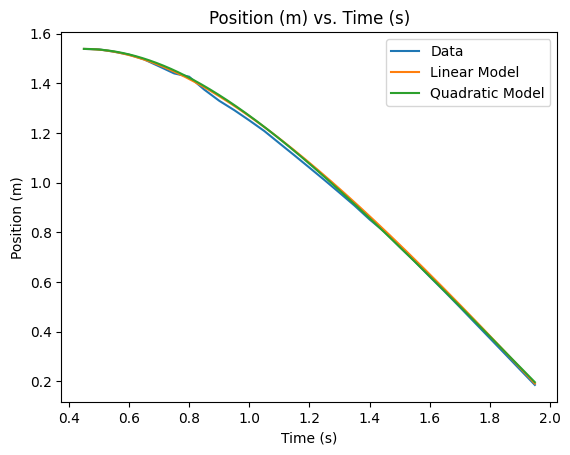

Linear Gravitational Acceleration: -2.455173552349152, Linear Coefficient: 0.00620382391733857, Linear Covariance: [[ 5.24692929e-03 -3.02501990e-05]
 [-3.02501990e-05  1.76900416e-07]]
Quadratic Gravitational Acceleration: -3.007626636237421, Quadratic Coefficient: 0.008278168790957392, Quadratic Covariance: [[ 8.90730118e-03 -4.54156632e-05]
 [-4.54156632e-05  2.33034802e-07]]


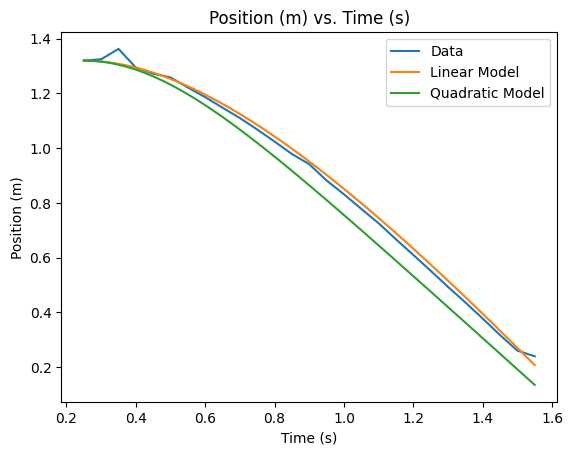

Linear Gravitational Acceleration: -3.3765288247407645, Linear Coefficient: 0.009878714125297222, Linear Covariance: [[ 2.17525414e-03 -1.12829312e-05]
 [-1.12829312e-05  5.89812124e-08]]
Quadratic Gravitational Acceleration: -2.5167845262296598, Quadratic Coefficient: 0.006631564994194065, Quadratic Covariance: [[ 1.19985708e-03 -7.52938280e-06]
 [-7.52938280e-06  4.84761244e-08]]


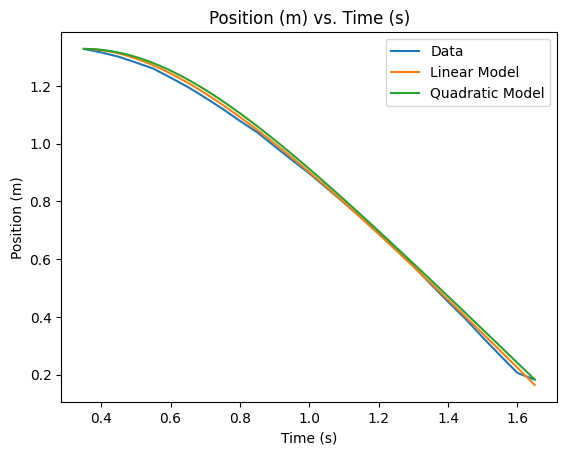

Linear Gravitational Acceleration: -3.780528421004568, Linear Coefficient: 0.011923880202785415, Linear Covariance: [[ 3.13229091e-03 -1.61028210e-05]
 [-1.61028210e-05  8.33323323e-08]]
Quadratic Gravitational Acceleration: -2.749419173974279, Quadratic Coefficient: 0.008162599485872536, Quadratic Covariance: [[ 1.44138303e-03 -9.04691890e-06]
 [-9.04691890e-06  5.80090068e-08]]


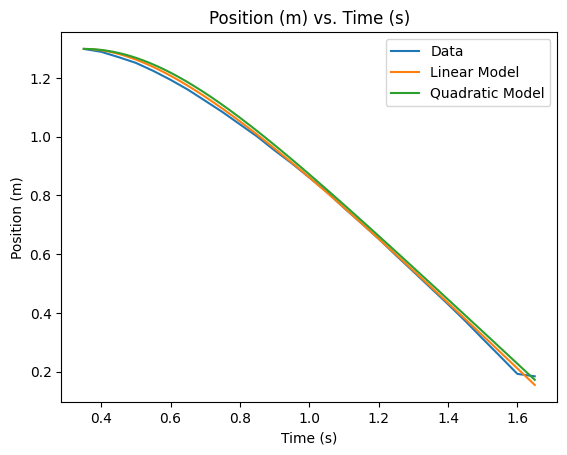

Linear Gravitational Acceleration: -1.8284499383187691, Linear Coefficient: 0.00417036740837853, Linear Covariance: [[ 1.21913525e-03 -7.51357600e-06]
 [-7.51357600e-06  4.70682765e-08]]
Quadratic Gravitational Acceleration: -1.5922766193876816, Quadratic Coefficient: 0.0033419304354350915, Quadratic Covariance: [[ 3.08296807e-04 -2.30472822e-06]
 [-2.30472822e-06  1.79310207e-08]]


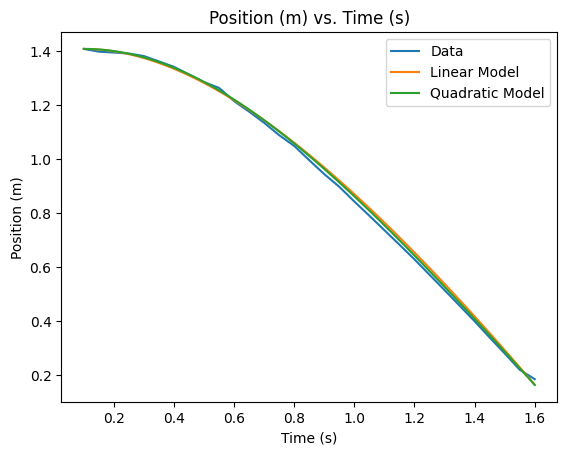

In [11]:
data1 = pd.read_csv("Sensor1.csv")
model("Sensor1", data1["Time (s)"], data1["Position (m)"], data1["Velocity (m/s)"])
data2 = pd.read_csv("Sensor2.csv")
model("Sensor2", data2["Time (s)"], data2["Position (m)"], data2["Velocity (m/s)"])
data3 = pd.read_csv("Sensor3.csv")
model("Sensor3", data3["Time (s)"], data3["Position (m)"], data3["Velocity (m/s)"])
data4 = pd.read_csv("Sensor4.csv")
model("Sensor4", data4["Time (s)"], data4["Position (m)"], data4["Velocity (m/s)"])
data5 = pd.read_csv("Sensor5.csv")
model("Sensor5", data5["Time (s)"], data5["Position (m)"], data5["Velocity (m/s)"])